In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette(sns.color_palette("Paired", 20))

In [2]:
# source https://github.com/CSSEGISandData/COVID-19/
# transpose matrices for better data handling

# confirmed COVID-19 positive cases
conf = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv").transpose()
# deceased cases
deaths = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv").transpose()
# recovery cases
recover = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv").transpose()

conf.head()

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
Province/State,NaN,NaN,NaN,NaN,NaN,British Columbia,New South Wales,Victoria,Queensland,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Virgin Islands, U.S.",NaN
Country/Region,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,Cambodia,...,Gabon,Guatemala,Guernsey,Mauritania,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,Suriname,US,occupied Palestinian territory
Lat,15,36,1.2833,28.1667,2.5,49.2827,-33.8688,-37.8136,-28.0167,11.55,...,-0.8037,15.7835,49.45,21.0079,-1.9403,13.9094,12.9843,3.9193,18.3358,31.9522
Long,101,138,103.833,84.25,112.5,-123.121,151.209,144.963,153.4,104.917,...,11.6094,-90.2308,-2.58,10.9408,29.8739,-60.9789,-61.2872,-56.0278,-64.8963,35.2332
1/22/20,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# assign second row as column names
conf.columns = conf.iloc[1]
deaths.columns = deaths.iloc[1]
recover.columns = recover.iloc[1]

In [4]:
# remove first 4 rows
conf = conf.iloc[4:]
deaths = deaths.iloc[4:]
recover = recover.iloc[4:]

In [5]:
# list contry names
set(list(conf.columns.values))

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cruise Ship',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guadeloupe',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jersey',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Korea, South',
 'Kuwait',
 '

In [6]:
# data are divided by province: sum provinces to obtain numbers by country
# China was not affected uniformly, therefore the population scaled numbers appear low (I will add the provence numbers lated)
conf = conf.groupby(by=conf.columns, axis=1).sum()
deaths = deaths.groupby(by=deaths.columns, axis=1).sum()
recover = recover.groupby(by=recover.columns, axis=1).sum()

In [7]:
# select only countries with > 700 positive COVID-19 cases
selected_columns = conf.max()>700
conf = conf.loc[:,selected_columns]
deaths = deaths.loc[:,selected_columns]
recover = recover.loc[:,selected_columns]

# sort columns by total number of positive cases
conf = conf.sort_values(conf.last_valid_index(), axis=1, ascending=False)
deaths = deaths.sort_values(deaths.last_valid_index(), axis=1, ascending=False)
recover = recover.sort_values(recover.last_valid_index(), axis=1, ascending=False)

Text(0, 0.5, 'Total number of positive COVID-19 cases (linear scale)')

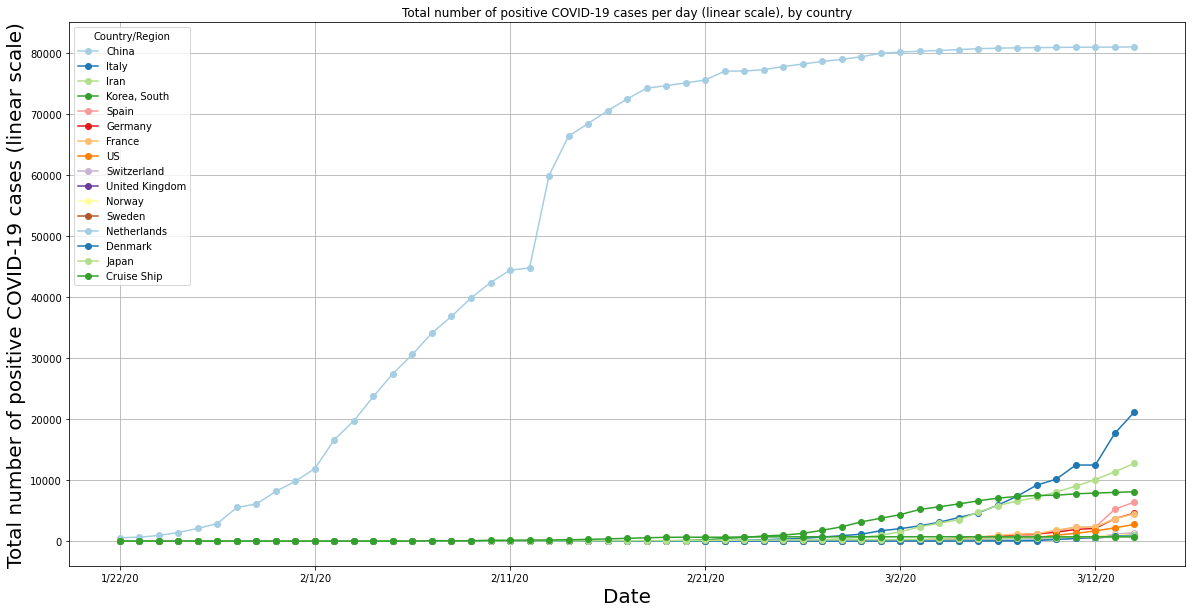

In [8]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(grid=True, marker='o',
         title='Total number of positive COVID-19 cases per day (linear scale), by country', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Total number of positive COVID-19 cases (linear scale)", fontsize=20)

Text(0, 0.5, 'Total number of positive COVID-19 cases (log scale)')

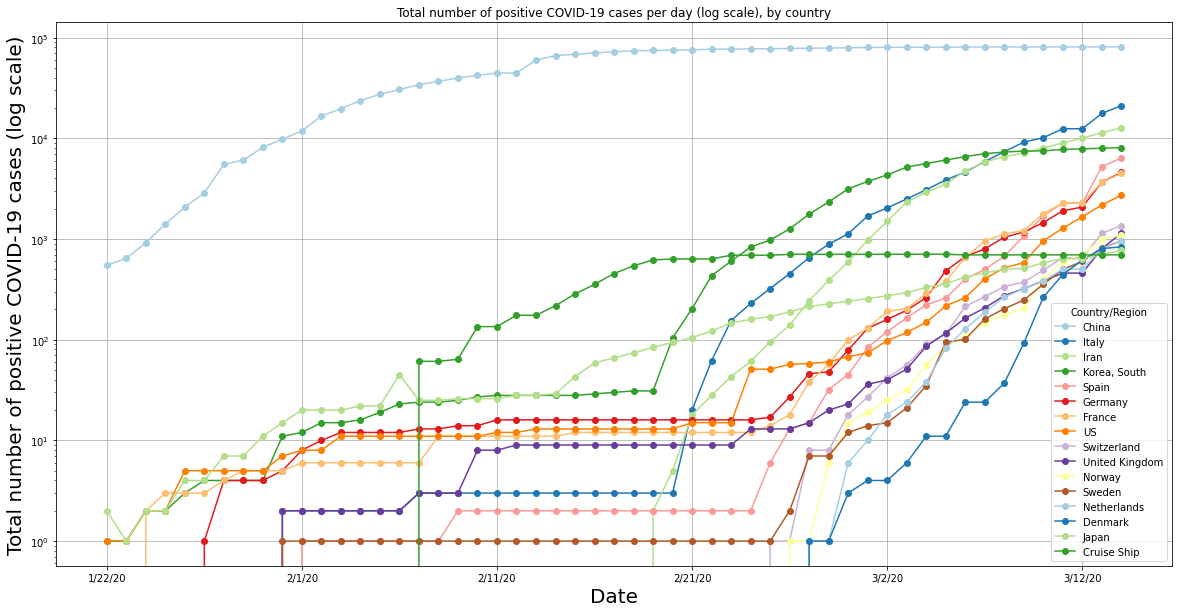

In [9]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(logy=True, grid=True, marker='o',
         title='Total number of positive COVID-19 cases per day (log scale), by country', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Total number of positive COVID-19 cases (log scale)", fontsize=20)

Text(0, 0.5, 'Total number of COVID-19 death cases (linear scale)')

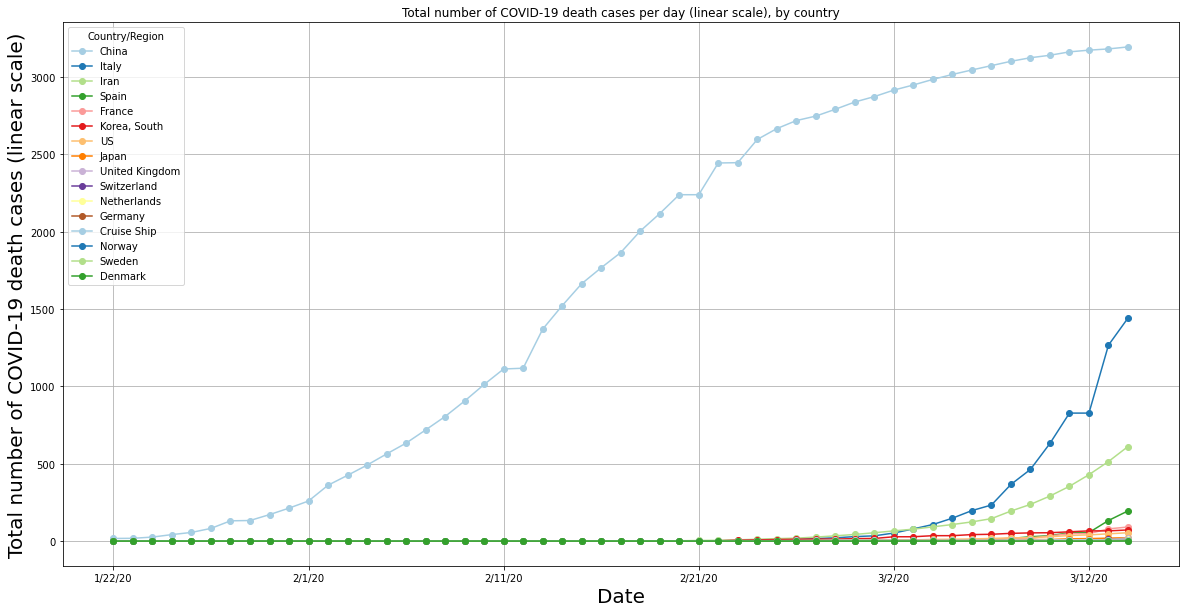

In [10]:
#show total number of positive cases
plot1 = deaths[deaths.columns.values].plot(grid=True, marker='o',
         title='Total number of COVID-19 death cases per day (linear scale), by country', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Total number of COVID-19 death cases (linear scale)", fontsize=20)

(0.0, 0.1)

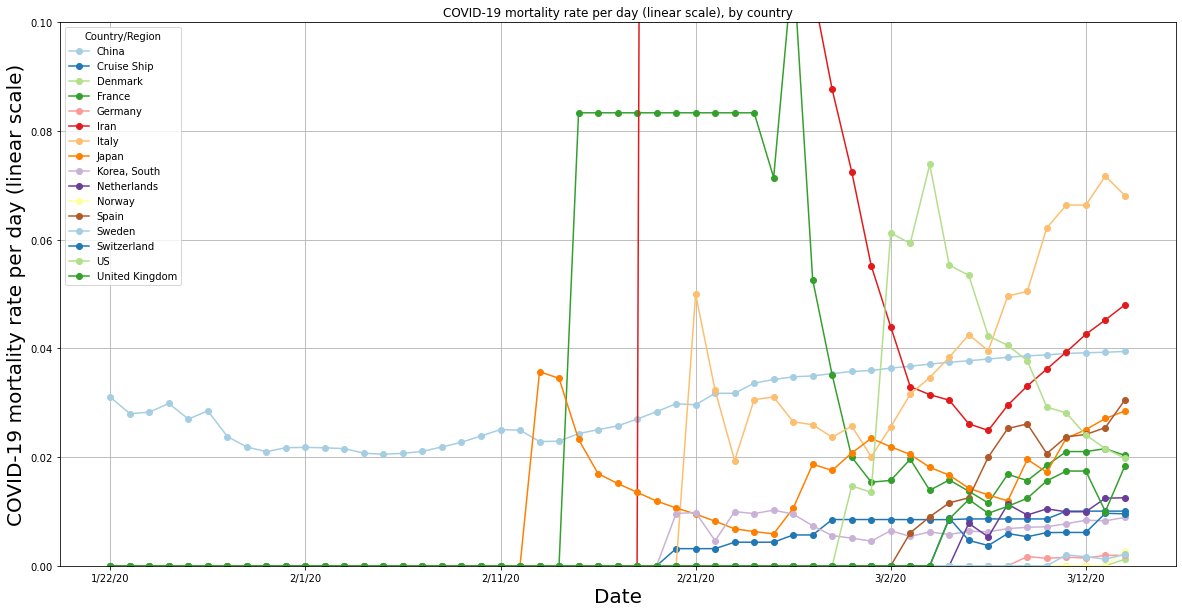

In [11]:
mortality = deaths.divide(conf.replace(0, 1))

#show total number of positive cases
plot1 = mortality[mortality.columns.values].plot(grid=True, marker='o',
         title='COVID-19 mortality rate per day (linear scale), by country', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("COVID-19 mortality rate per day (linear scale)", fontsize=20)
plot1.set_ylim(0,0.1)

In [12]:
# retrieve population information
# source https://population.un.org/wpp/Download/Standard/Population/
population = pd.read_csv("WPP2019_TotalPopulationBySex.csv")

In [13]:
# select only country codes for year 2020, transpose and remove columns to make it similar to COVID-19 data
population = population[(population["Time"] == 2020) & (population["VarID"] == 2) & (population["LocID"] < 910)]
population = population[["Location","PopTotal"]].transpose()
population.columns = population.iloc[0]
population = population.iloc[1:]
population.head()
# population numbers are expressed in 1e3

Location,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,World,Yemen,Zambia,Zimbabwe
PopTotal,38928.3,1.3406e+06,2877.8,43851,55.197,77.265,32866.3,15.002,97.928,45195.8,...,33469.2,307.15,28435.9,97338.6,11.246,597.33,7.7948e+06,29826,18384,14862.9


In [14]:
# list country names
set(list(population.columns.values))

{'Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bonaire, Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, Taiwan Province of China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Dem. People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',


In [15]:
# rename population country names that don't match COVID-19 data
population = population.rename(columns={
 'Bolivia (Plurinational State of)': 'Bolivia',
 'Brunei Darussalam': 'Brunei',
 'Congo (Kinshasa)': 'Congo',
 "Cote d'Ivoire":  "Côte d'Ivoire",
 'Iran (Islamic Republic of)':  'Iran',
 'Republic of Korea': 'Korea, South',
 'Republic of Moldova':  'Moldova',
 'Russian Federation':  'Russia',
 'China, Taiwan Province of China':  'Taiwan*',
 'United States of America':  'US',
 'Viet Nam':  'Vietnam'
    }
        )

In [16]:
# concatenate dataset
conf = pd.concat([population,conf])
conf.head()

,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Vanuatu,Venezuela (Bolivarian Republic of),Vietnam,Wallis and Futuna Islands,Western Sahara,World,Yemen,Zambia,Zimbabwe,Cruise Ship
PopTotal,38928.3,1.3406e+06,2877.8,43851,55.197,77.265,32866.3,15.002,97.928,45195.8,...,307.15,28435.9,97338.6,11.246,597.33,7.7948e+06,29826,18384,14862.9,NaN
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1/23/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1/24/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1/25/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [17]:
# divide cases rows by population/10 row to obtain number of cases per 1e4 persons
conf = conf.loc[:].div(conf.iloc[0][:]/10)

In [18]:
# remove population row
conf = conf.iloc[1:]
conf.dropna(axis=1, inplace=True)
conf.head()

,China,Denmark,France,Germany,Iran,Italy,Japan,Netherlands,Norway,"Korea, South",Spain,Sweden,Switzerland,United Kingdom,US
1/22/20,0.00380734,0,0,0,0,0,0.000158132,0,0,0.000195049,0,0,0,0,3.02112e-05
1/23/20,0.00446738,0,0,0,0,0,7.90661e-05,0,0,0.000195049,0,0,0,0,3.02112e-05
1/24/20,0.00639189,0,0.000306403,0,0,0,0.000158132,0,0,0.000390098,0,0,0,0,6.04225e-05
1/25/20,0.00976848,0,0.000459605,0,0,0,0.000158132,0,0,0.000390098,0,0,0,0,6.04225e-05
1/26/20,0.0144165,0,0.000459605,0,0,0,0.000316264,0,0,0.000585147,0,0,0,0,0.000151056


Text(0, 0.5, "Number of positive COVID-19 cases per 10'000 people (linear scale)")

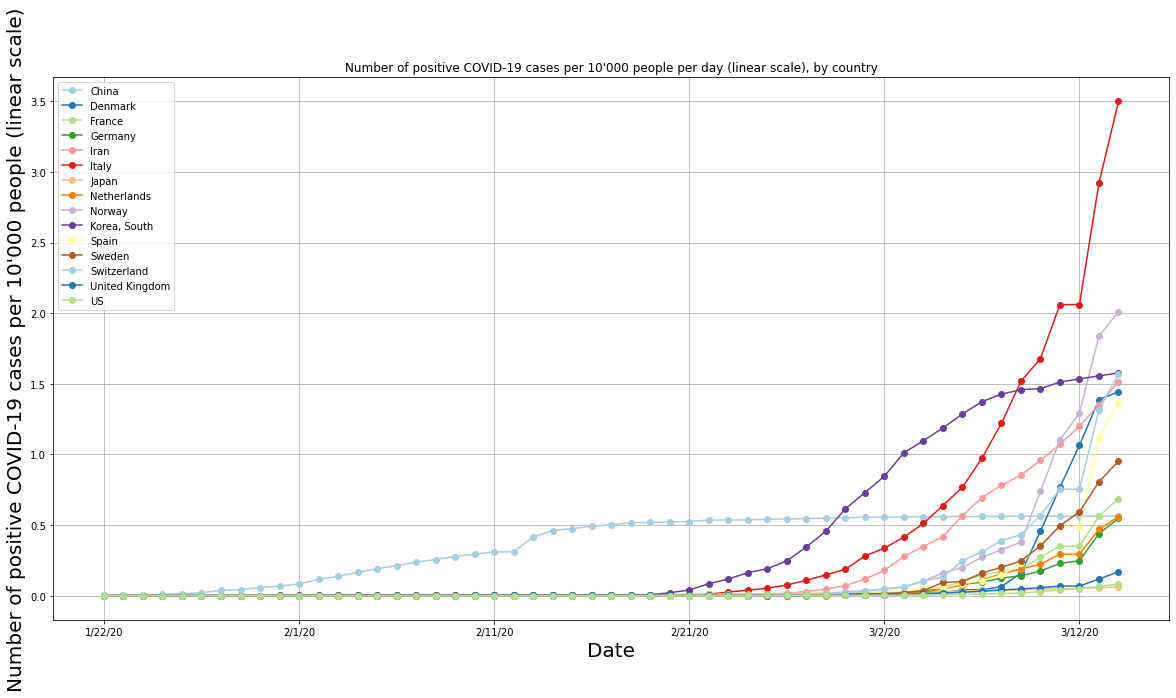

In [19]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(grid=True, marker='o',
         title="Number of positive COVID-19 cases per 10'000 people per day (linear scale), by country", figsize = (20,10),)
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Number of positive COVID-19 cases per 10'000 people (linear scale)", fontsize=20)

Text(0, 0.5, "Number of positive COVID-19 cases per 10'000 people (log scale)")

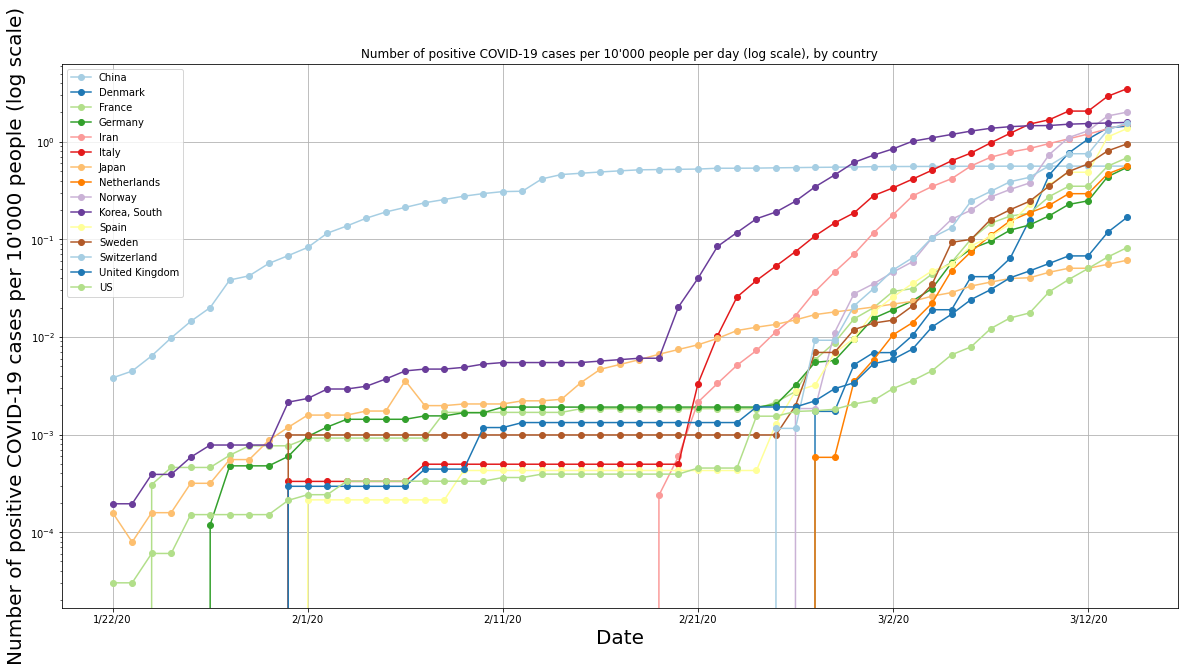

In [20]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(logy=True, grid=True, marker='o',
         title="Number of positive COVID-19 cases per 10'000 people per day (log scale), by country", figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Number of positive COVID-19 cases per 10'000 people (log scale)", fontsize=20)